<a href="https://colab.research.google.com/github/nbs19/deep-learning/blob/main/mpneuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [123]:
import sklearn.datasets
import numpy as np


In [124]:
breast_cancer=sklearn.datasets.load_breast_cancer()


In [125]:
x=breast_cancer.data
y=breast_cancer.target
print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [126]:
print(x.shape,y.shape)

(569, 30) (569,)


In [127]:
import pandas as pd

In [128]:
data= pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
print(data)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [129]:
data['class']=breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [130]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [131]:
print(breast_cancer.target_names)

['malignant' 'benign']


#train_test spliting of data

In [132]:
from sklearn.model_selection import train_test_split


In [133]:
x=data.drop('class',axis=1)
y=data['class']

In [134]:
type(x)

pandas.core.frame.DataFrame

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (426, 30) (143, 30)


In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (512, 30) (57, 30)


we calculate mean because to see that test data and train data are equally weighted

In [137]:
print(y.mean(),y_train.mean(),y_test.mean())

0.6274165202108963 0.623046875 0.6666666666666666


to solve this we use command "stratify" this will equally divide the mean between train set and test set

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y)

In [139]:
print(x.mean(),x_train.mean(),x_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

paina chusava x_train & x_test (y also) data mean is varying (ante test data different ga split avutundi ) every time you ran the cmd train_test_split() ,so to ensure that when ever you run code after sometime the split maintian same ,we use command "random_state=1" (equated to any constant)

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

startify is used for only binary classification (only y)

# binarisation of inputs

In [141]:
import matplotlib.pyplot as plt

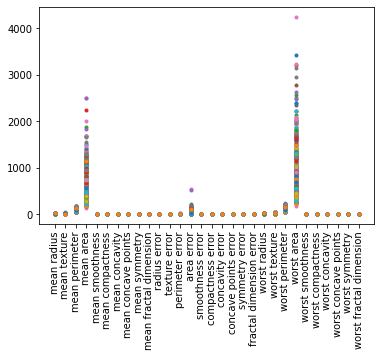

In [142]:
plt.plot(x_train.T,'.')
plt.xticks(rotation='vertical')
plt.show()

 this syntax is only used for data frames not lists x_bianrised_3=x_train['mean area'].map(lambda x:1 if x>1000 else 0) 

In [143]:
x_binarised_3=pd.DataFrame(map(lambda x:1 if x >1000 else 0,x_train['mean area'] ))  #x_bianrised_3=x_train['mean area'].map(lambda x:1 if x>1000 else 0)
print(x_binarised_3)

     0
0    0
1    0
2    0
3    0
4    0
..  ..
507  0
508  0
509  0
510  0
511  1

[512 rows x 1 columns]


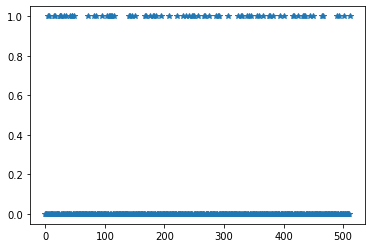

In [144]:
plt.plot(x_binarised_3,'*')

In [145]:
x_binarised_train=x_train.apply(pd.cut,bins=2,labels=[1,0])
print(x_binarised_train)

    mean radius mean texture  ... worst symmetry worst fractal dimension
430           1            1  ...              1                       1
48            1            1  ...              1                       1
105           1            1  ...              1                       0
467           1            1  ...              1                       1
547           1            1  ...              1                       1
..          ...          ...  ...            ...                     ...
201           1            1  ...              1                       1
183           1            1  ...              1                       1
285           1            1  ...              1                       1
49            1            1  ...              1                       1
161           0            1  ...              1                       1

[512 rows x 30 columns]


In [146]:
x_binarised_test=x_test.apply(pd.cut,bins=2,labels=[1,0])
type(x_binarised_test)


pandas.core.frame.DataFrame

now the type is in dataframe we should convert them to ndarray type

In [147]:
x_binarised_train=x_binarised_train.values
x_binarised_test=x_binarised_test.values
type(x_binarised_train)
print(x_binarised_train)

[[1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 1 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 1 0 ... 0 1 1]]


#mpnueron model

In [148]:
from random import randint

In [149]:
b=3
i=randint(0,x_binarised_train.shape[0])
print(i)
if (np.sum(x_binarised_train[i,:])>=b):
  print("mpnueron inference is malignant")
else:
  print("mpnueron inference is benign")  
if (y_train[i]==1):
  print("real mpnueron inference is malignant")
else:
  print("real mpnueron inference is benign")

  

358
mpnueron inference is malignant
real mpnueron inference is malignant


In [150]:
b=3
y_pred_train=[]
accurate_rows=0
for x,y in zip(x_binarised_train,y_train):
 pred=np.sum(x)>=b
 y_pred_train.append(pred)
 accurate_rows+=(y==pred)
 

In [151]:
for b in range(x_binarised_train.shape[1]+1):
 y_pred_train=[]
 accurate_rows=0
 for x,y in zip(x_binarised_train,y_train):
  pred=(np.sum(x)>=b)
  y_pred_train.append(pred)
  accurate_rows+=(y==pred)
 print(b,accurate_rows,accurate_rows/x_binarised_train.shape[0])  


0 321 0.626953125
1 321 0.626953125
2 321 0.626953125
3 321 0.626953125
4 321 0.626953125
5 321 0.626953125
6 321 0.626953125
7 321 0.626953125
8 321 0.626953125
9 321 0.626953125
10 321 0.626953125
11 321 0.626953125
12 321 0.626953125
13 321 0.626953125
14 323 0.630859375
15 324 0.6328125
16 329 0.642578125
17 332 0.6484375
18 336 0.65625
19 340 0.6640625
20 344 0.671875
21 352 0.6875
22 359 0.701171875
23 371 0.724609375
24 387 0.755859375
25 402 0.78515625
26 419 0.818359375
27 433 0.845703125
28 435 0.849609375
29 417 0.814453125
30 389 0.759765625
